In [474]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition and Understanding


In [475]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [476]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [477]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [478]:

# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Cleaning

In [479]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

by above results we can conclude that there is no missing values in the data

In [480]:
for feature in df:
    print(df[feature].value_counts(),"\n")

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64 

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64 

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2

From above results we can conclude there is no unwanted symbols in the data

# Data Exploration and Visualization

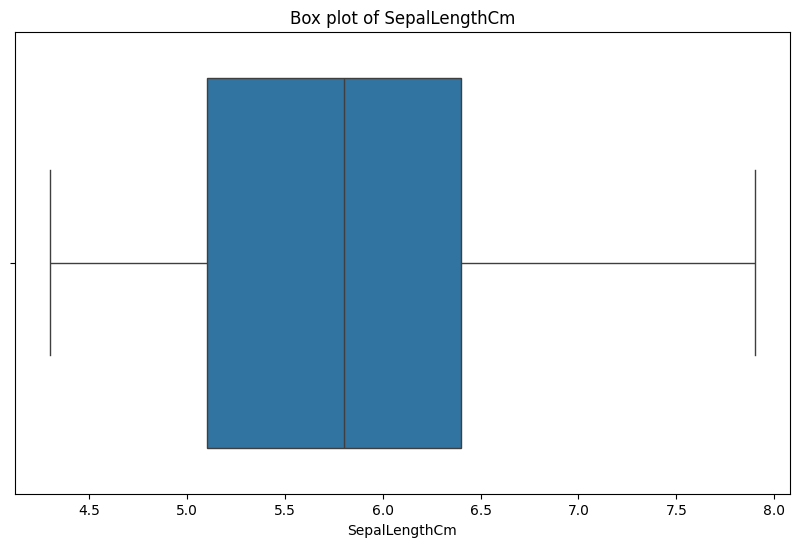

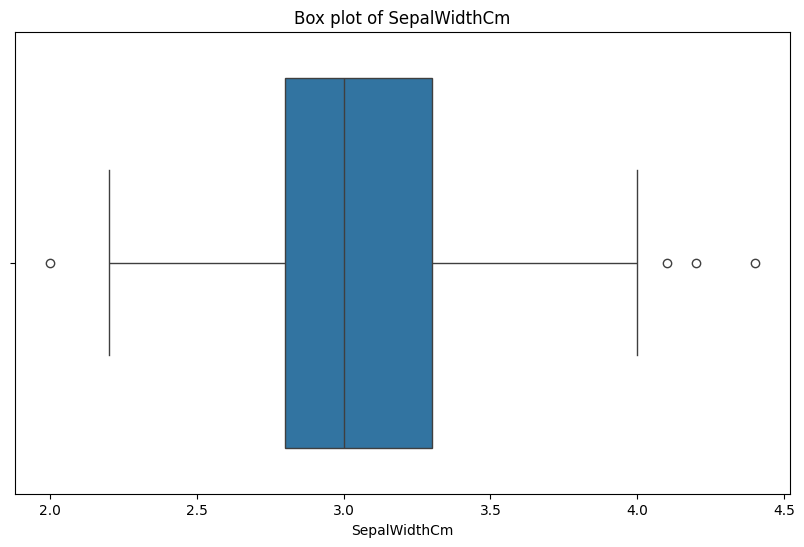

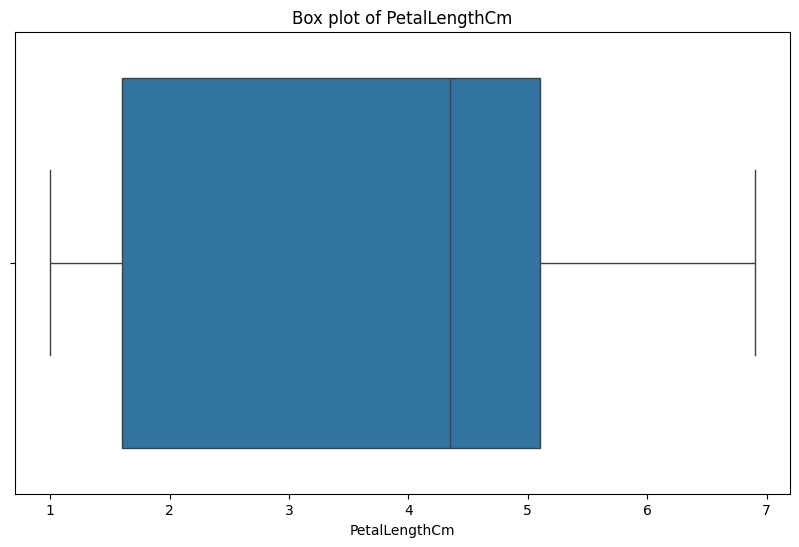

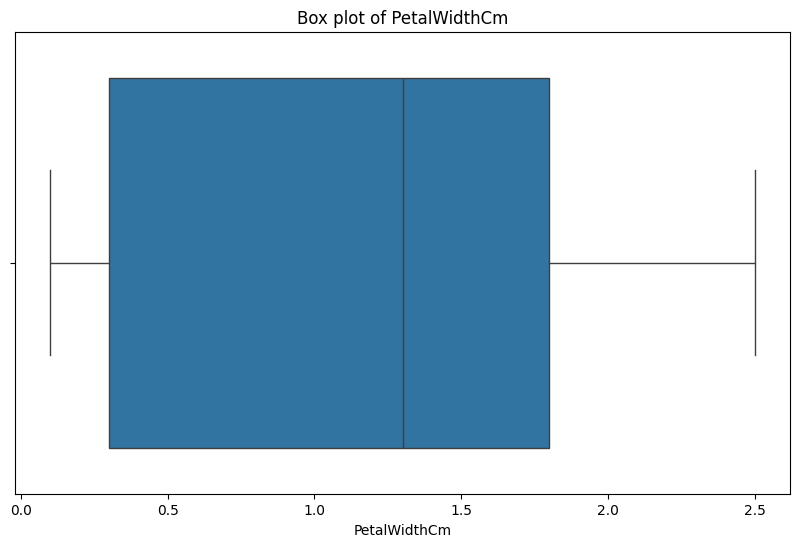

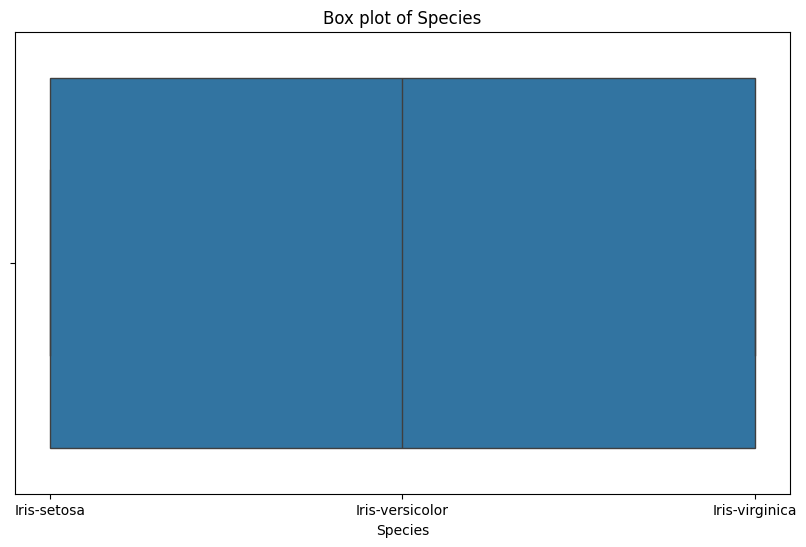

In [481]:
# box plot
features = [feature for feature in df.columns]


for feature in features:
    mtp.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    mtp.title(f'Box plot of {feature}')
    mtp.show()

In [482]:
# identifying outliers using IQR method in SepalWidth Column
q1=df["SepalWidthCm"].quantile(0.25)
q3=df["SepalWidthCm"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(2.8, 3.3, 0.5)

In [483]:
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
lowerlimit,upperlimit

(2.05, 4.05)

In [484]:
#using capping method filling oultliers
df.loc[(df["SepalWidthCm"]>upperlimit),"SepalWidthCm"]=upperlimit
df.loc[(df["SepalWidthCm"]<lowerlimit),"SepalWidthCm"]=lowerlimit

<Axes: ylabel='SepalWidthCm'>

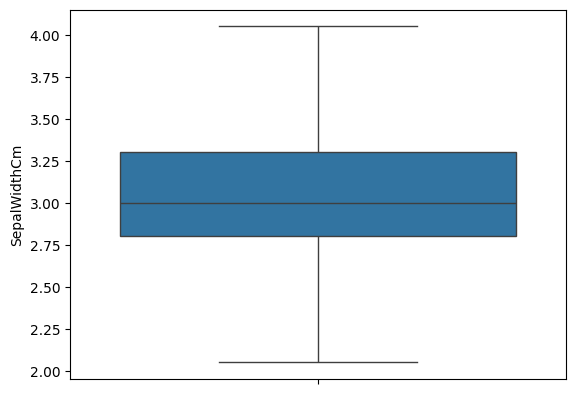

In [485]:
sns.boxplot(df["SepalWidthCm"])

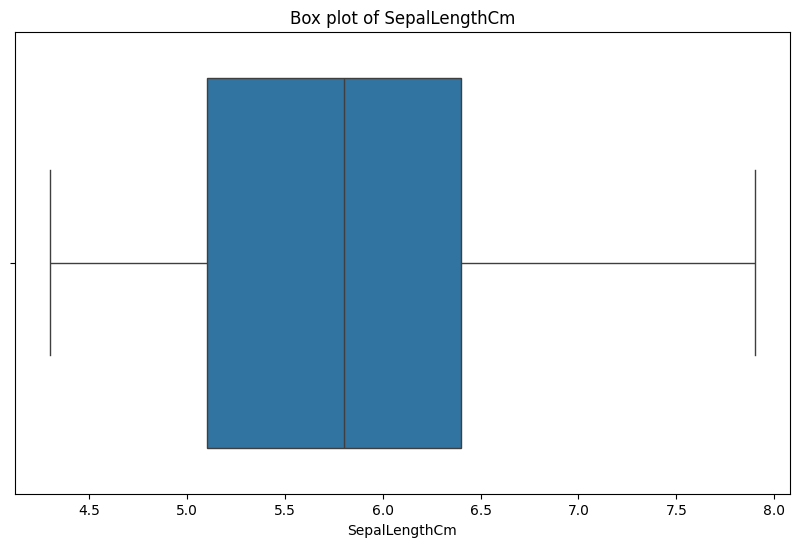

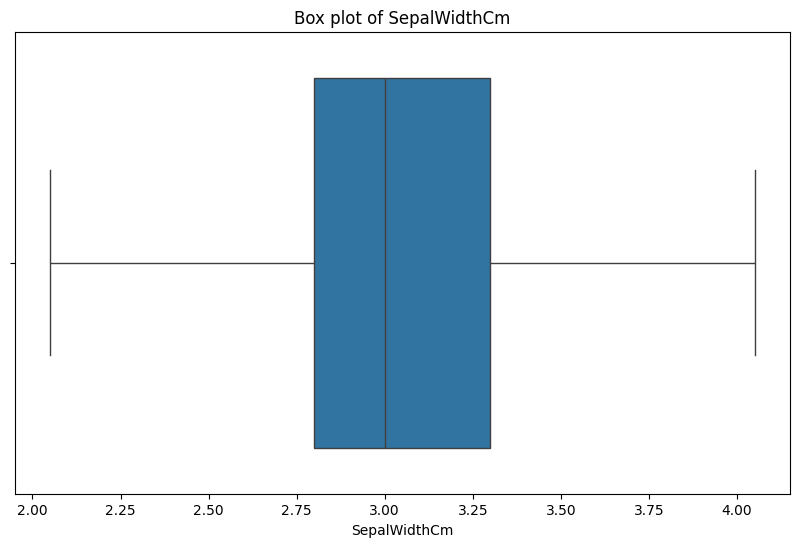

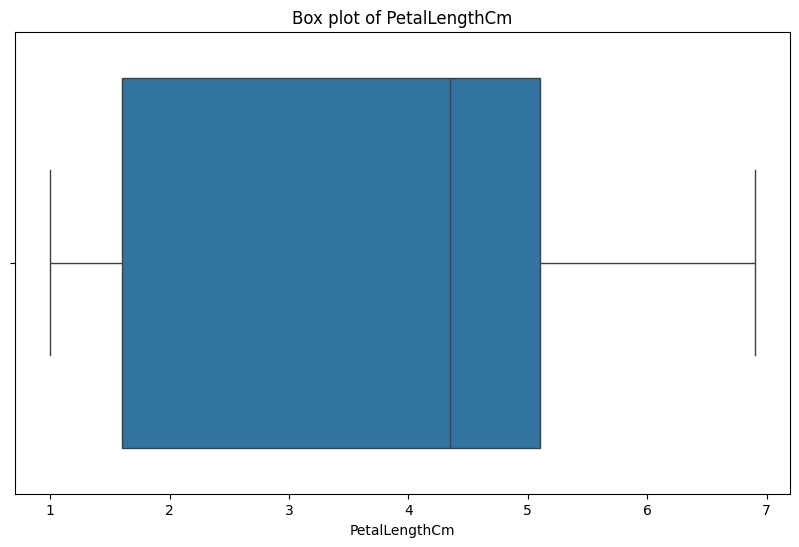

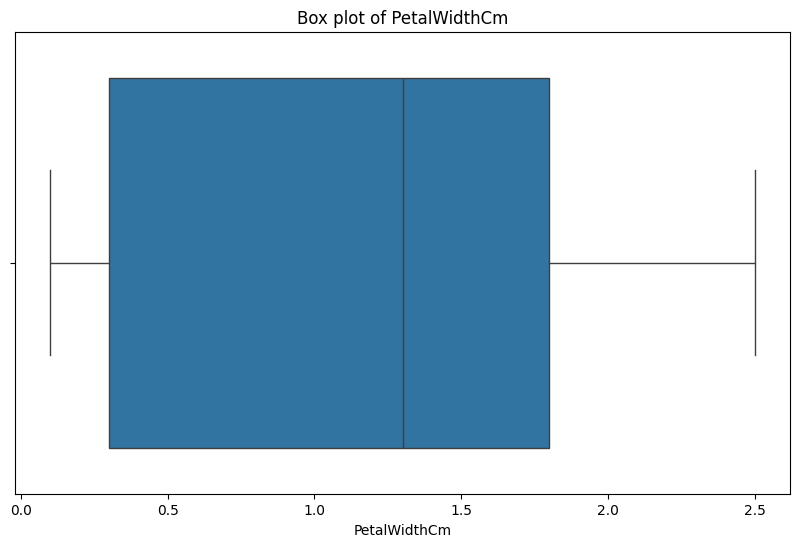

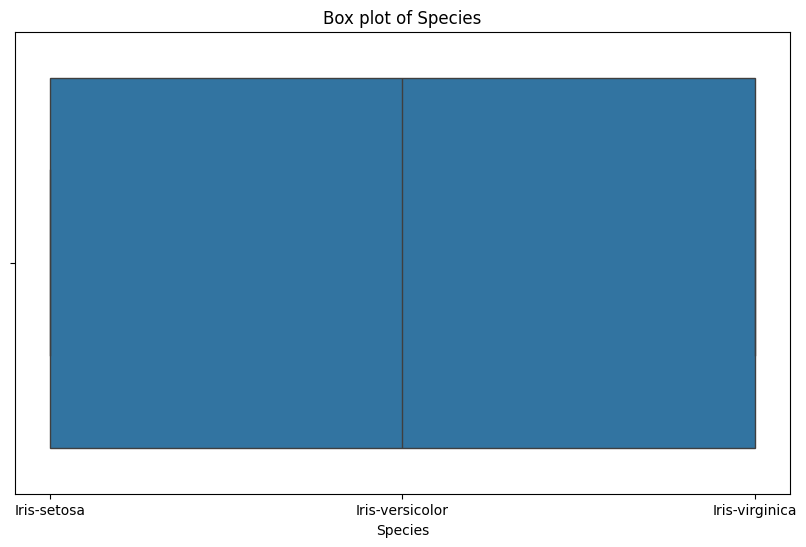

In [486]:
for feature in features:
    mtp.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    mtp.title(f'Box plot of {feature}')
    mtp.show()

<Axes: >

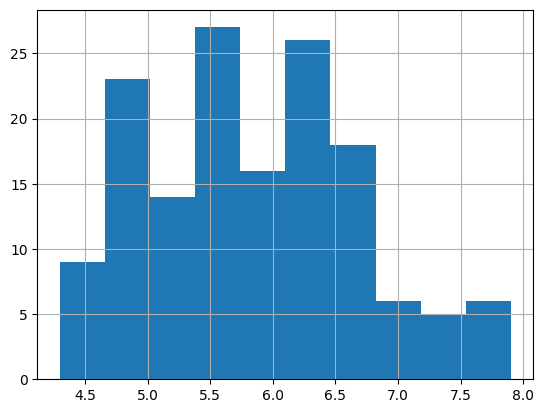

In [487]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

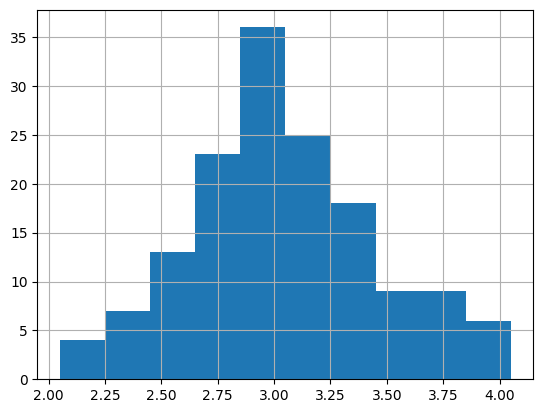

In [488]:
df['SepalWidthCm'].hist()

<Axes: >

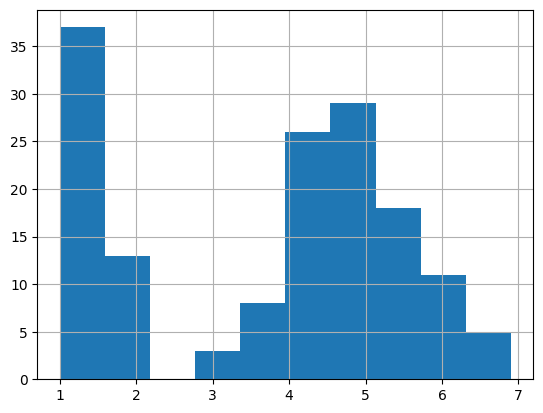

In [489]:

df['PetalLengthCm'].hist()

<Axes: >

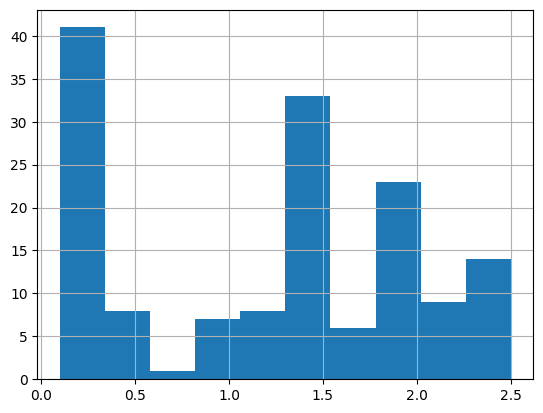

In [490]:
df['PetalWidthCm'].hist()

In [491]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

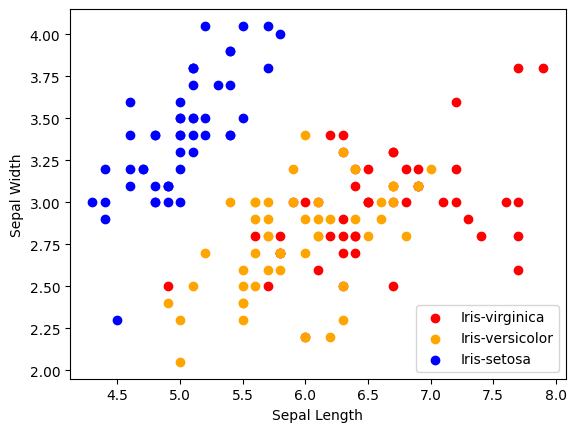

In [492]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

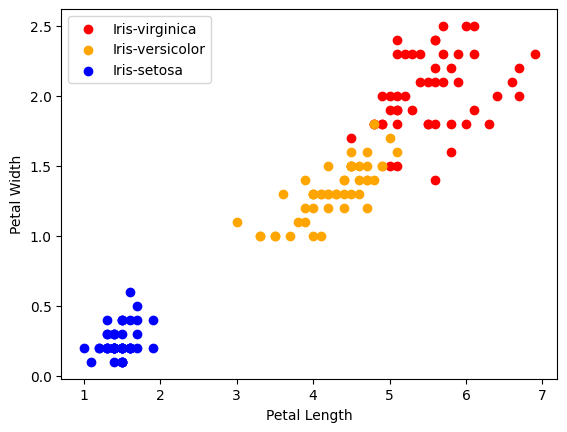

In [493]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

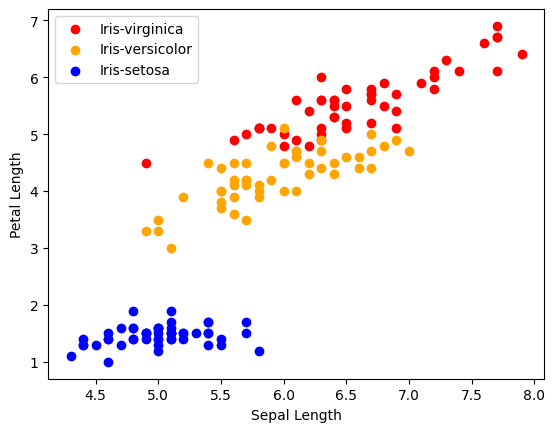

In [494]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

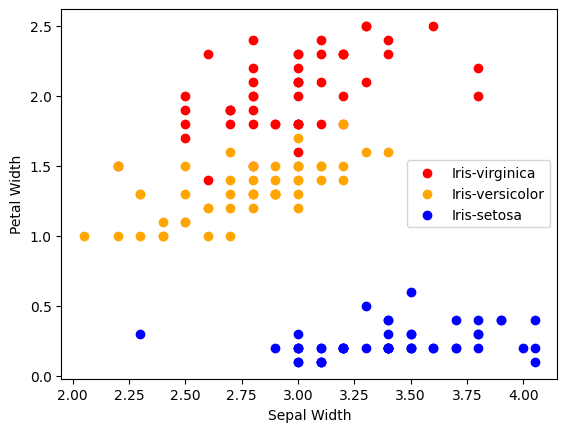

In [495]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


# Data Transformation

In [496]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
y = df['Species']
df.drop('Species', axis=1, inplace=True)
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df['Species']=y
df.head()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.065722,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.120170,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.354187,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.117008,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.302901,-1.341272,-1.312977,Iris-setosa


In [497]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.065722,-1.341272,-1.312977,0
1,-1.143017,-0.120170,-1.341272,-1.312977,0
2,-1.385353,0.354187,-1.398138,-1.312977,0
3,-1.506521,0.117008,-1.284407,-1.312977,0
4,-1.021849,1.302901,-1.341272,-1.312977,0


In [498]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954,0.782561
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582,-0.419264
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000,0.956464
Species,0.782561,-0.419264,0.949043,0.956464,1.000000


<Axes: >

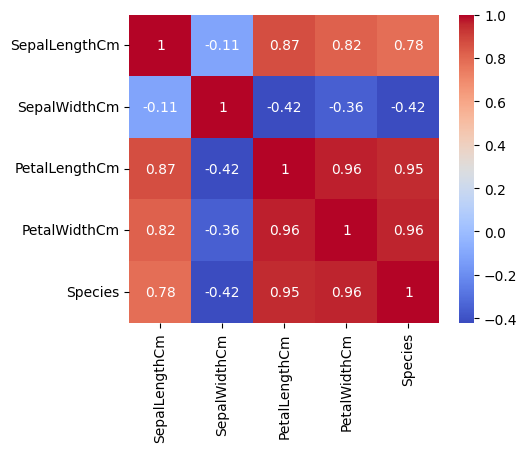

In [499]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# 
Model Training

In [500]:

from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [501]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [502]:
# model training
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [503]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

print(classification_report(y_test, y_pred))

Accuracy:  97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The optimal number of neighbors is: 11


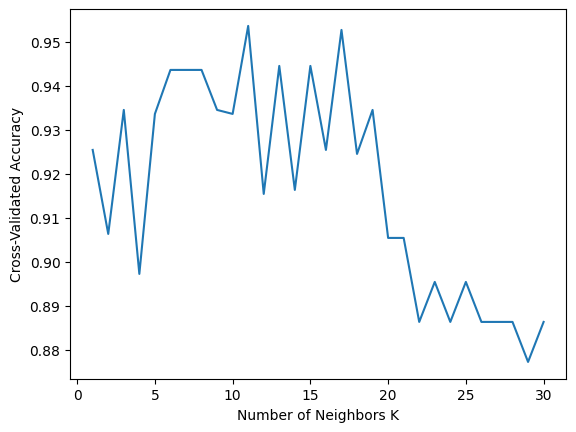

In [504]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Range of k values to try
k_values = range(1, 31)
cv_scores = []

# Perform 10-fold cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determine the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is:", optimal_k)

# Plot the misclassification error versus k
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [505]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [506]:
y_pred = knn.predict(x_test)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

print(classification_report(y_test, y_pred))

Accuracy:  97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [507]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [508]:

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [509]:
y_pred = model.predict(x_test)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

print(classification_report(y_test, y_pred))

Accuracy:  97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

